LAB 3 SC1015

In [111]:
#Basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

PROBLEM 1A

In [112]:
traindata = pd.read_csv('train.csv')
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [113]:
# Extract only the numeric data variables
theAreas = pd.DataFrame(traindata[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
#capitalise DataFrame, not dataframe
#SalePrice included to display relationship as question wants
#SalePrice is not a variable

# Summary Statistics for all variables
traindata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


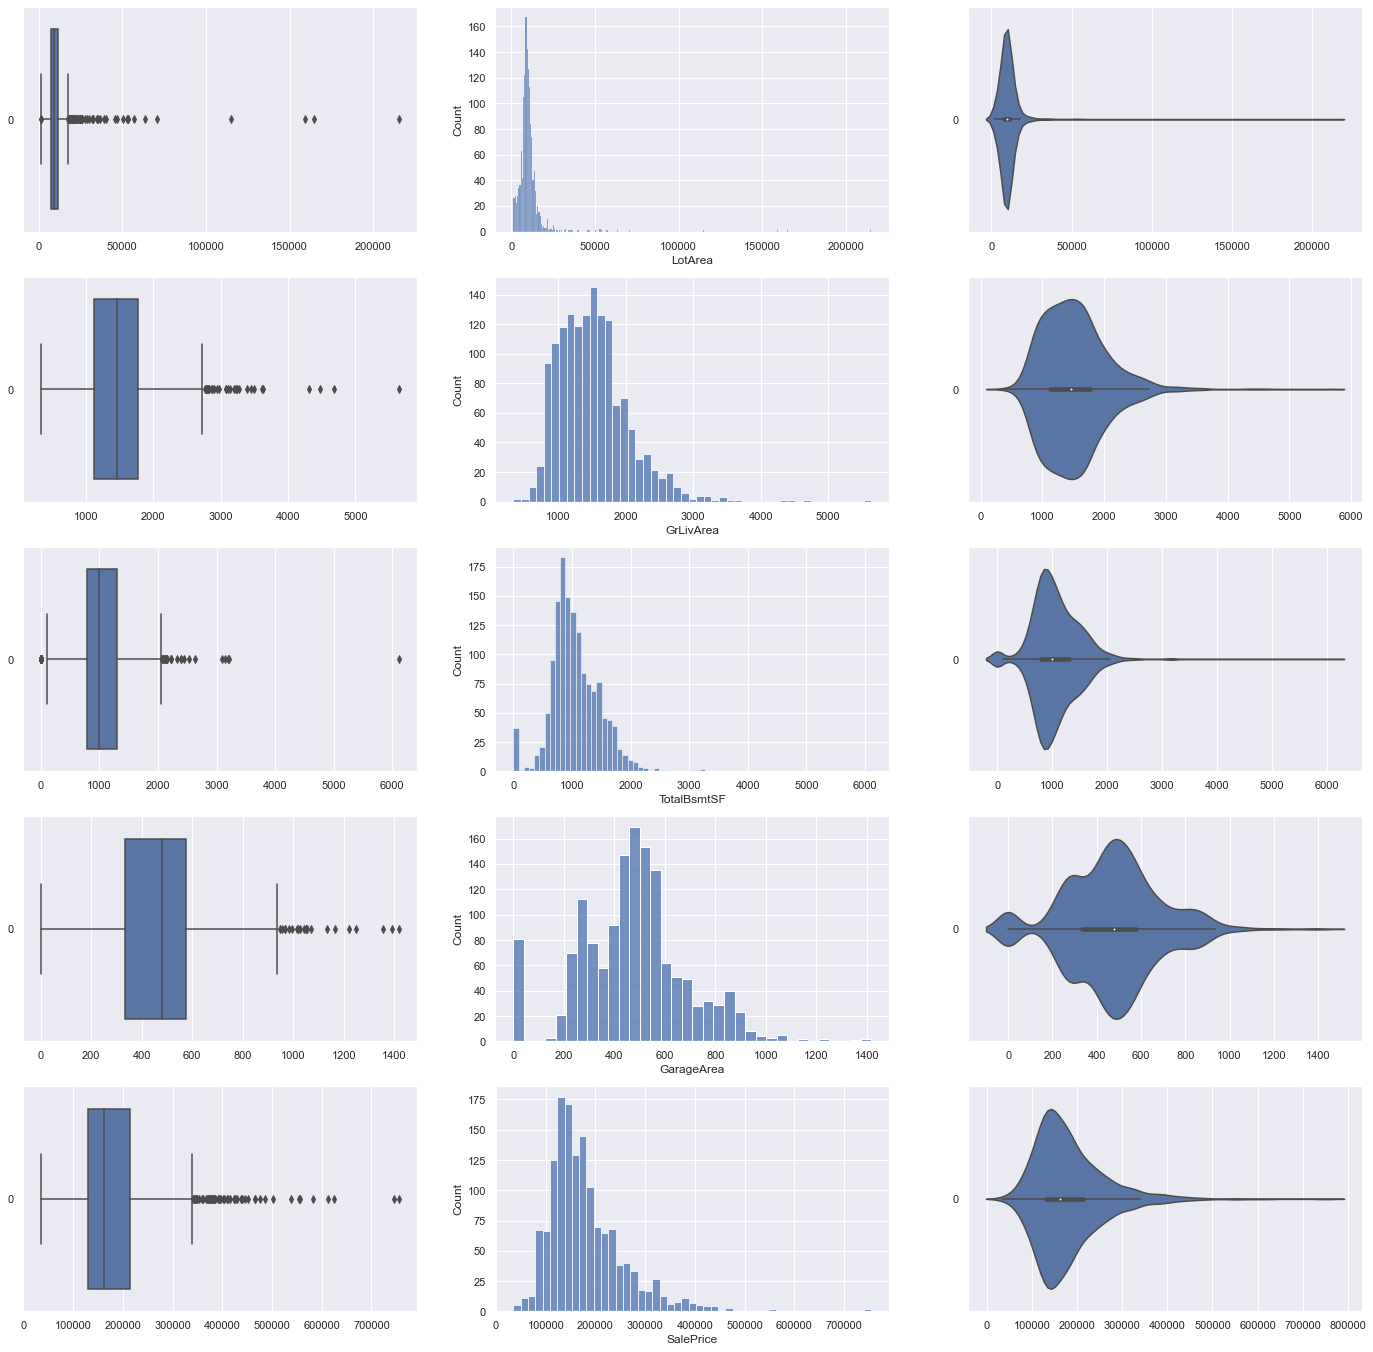

In [116]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize = (24, 24)) #5 variables, 3 diagrams

count = 0
for var in theAreas:
    sb.boxplot(data = theAreas[var], orient = "h", ax = axes[count,0]) #for boxplot
    sb.histplot(data = theAreas[var], ax = axes[count,1]) #for histogram
    sb.violinplot(data = theAreas[var], orient = "h", ax = axes[count, 2]) #for violinplot
    count += 1    

In [117]:
lotArea = traindata['LotArea']

#finding the interquartile range (IQR)
Q1 = np.quantile(lotArea, 0.25)
Q3 = np.quantile(lotArea, 0.75)
IQR = Q3 - Q1
median = np.median(lotArea)

#find upper bound
upperBound = Q3+1.5*IQR

#find lower bound
lowerBound = Q1-1.5*IQR

print(IQR, upperBound, lowerBound)

outliers = lotArea[(lotArea <= lowerBound) | (lotArea >= upperBound)]
print("The following are the outliers in the boxplot:" + str(len(outliers)))





4048.0 17673.5 1481.5
The following are the outliers in the boxplot:69


In [118]:
GrLivArea = traindata['GrLivArea']

#finding the interquartile range (IQR)
Q1 = np.quantile(GrLivArea, 0.25)
Q3 = np.quantile(GrLivArea, 0.75)
IQR = Q3 - Q1
median = np.median(GrLivArea)

#find upper bound
upperBound = Q3+1.5*IQR

#find lower bound
lowerBound = Q1-1.5*IQR

print(IQR, upperBound, lowerBound)

outliers = GrLivArea[(GrLivArea <= lowerBound) | (GrLivArea >= upperBound)]
print("The following are the outliers in the boxplot:" + str(len(outliers)))

647.25 2747.625 158.625
The following are the outliers in the boxplot:31


In [119]:
TotalBsmtSF = traindata['TotalBsmtSF']

#finding the interquartile range (IQR)
Q1 = np.quantile(TotalBsmtSF, 0.25)
Q3 = np.quantile(TotalBsmtSF, 0.75)
IQR = Q3 - Q1
median = np.median(TotalBsmtSF)

#find upper bound
upperBound = Q3+1.5*IQR

#find lower bound
lowerBound = Q1-1.5*IQR

print(IQR, upperBound, lowerBound)

outliers = TotalBsmtSF[(TotalBsmtSF <= lowerBound) | (TotalBsmtSF >= upperBound)]
print("The following are the outliers in the boxplot:" + str(len(outliers)))

502.5 2052.0 42.0
The following are the outliers in the boxplot:61


In [120]:
GarageArea = traindata['GarageArea']

#finding the interquartile range (IQR)
Q1 = np.quantile(GarageArea, 0.25)
Q3 = np.quantile(GarageArea, 0.75)
IQR = Q3 - Q1
median = np.median(GarageArea)

#find upper bound
upperBound = Q3+1.5*IQR

#find lower bound
lowerBound = Q1-1.5*IQR

print(IQR, upperBound, lowerBound)

outliers = GrLivArea[(GarageArea <= lowerBound) | (GarageArea >= upperBound)]
print("The following are the outliers in the boxplot:" + str(len(outliers)))

241.5 938.25 -27.75
The following are the outliers in the boxplot:21


#ANSWER FOR PROBLEM 1A: 
LotArea has the most number of outliers of 69

PROBLEM 1B

In [121]:
#finding most skewed
theAreas.skew()
#LotArea is the most skewed because skew value is the greatest and >1

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

ANSWER TO 1B:
LotArea is the most skewed because skew value is the greatest
The value is also positive

PROBLEM 1C

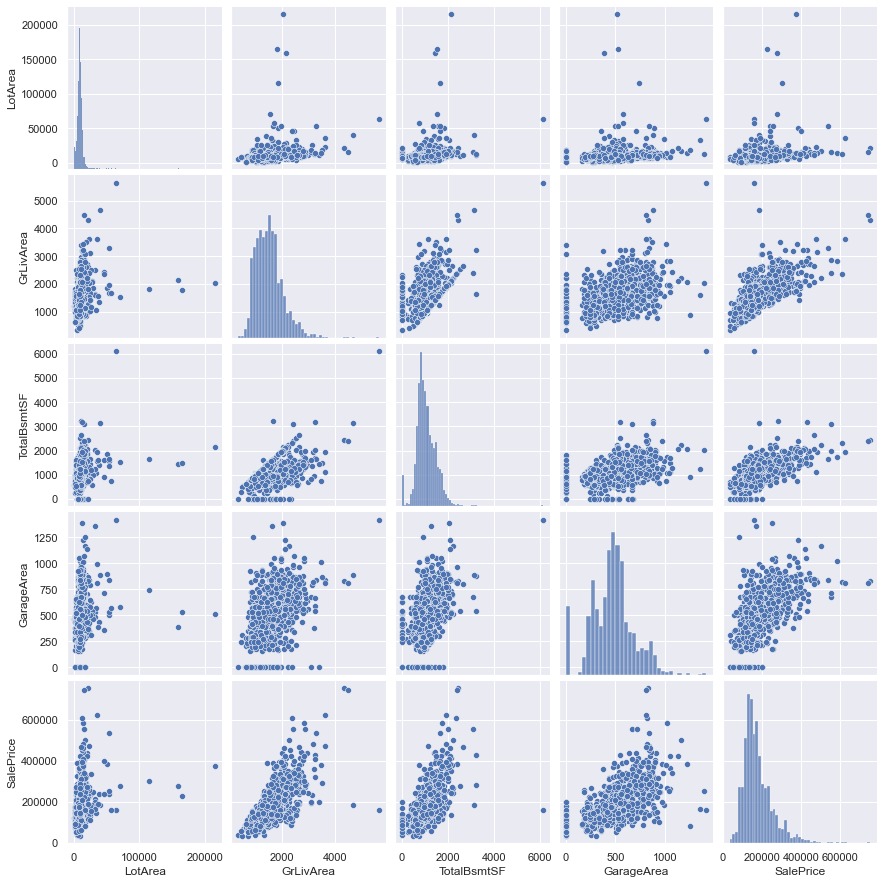

In [122]:
#form relationship between 2 variables
#Pair-Plot of Multi-Variate Data
#Can look at how each variable looks like or the variable distributions are like
#Mirror image so split the image into a half-triangle
#The pts more clustered together are more close correlated

sb.pairplot(data = theAreas)

<AxesSubplot:>

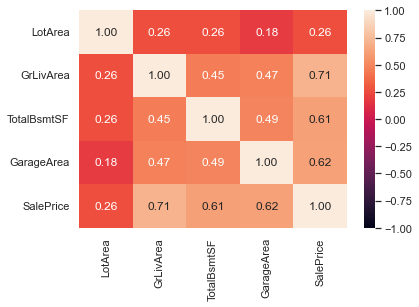

In [123]:
#Mutual correlation: Only tells us how strong the relation is, doesn;t tell us what exactly the relation looks like
sb.heatmap(theAreas.corr(), vmin = -1, annot = True, fmt = ".2f")

#all positive correlations here
#from this heatmap, highest correlation with SalePrice are GrLiveArea and GarageArea

In [124]:
theAreas.corr()
#Since GrLivArea, GarageArea are the least skewed 
#most correlated to SalePrice
#most consistent in predicting SalePrice of houses in the data
#most linear relationship

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


ANSWER TO PROBLEM 1C:
Since GrLivArea, GarageArea are the least skewed and are the most correlated to SalePrice, it is the most consistent in predicting SalePrice of houses in the data, most linear relationship

Thus answer is GrLivArea and GarageArea

PROBLEM 2A

In [125]:
categorical_data = pd.DataFrame(traindata[["MSSubClass", "Neighborhood", "BldgType", "OverallQual", "SalePrice"]])
categorical_data.head()

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000


ANSWER TO PROBLEM 2A

Neighbourhood has the highest number of levels at 25

North Ames has the most number of houses at 225

PROBLEM 2B

In [127]:
categorical_data['MSSubClass'].nunique()

15

In [128]:
categorical_data['Neighborhood'].nunique()

25

In [129]:
print(categorical_data["Neighborhood"].value_counts())

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


In [130]:
categorical_data['BldgType'].nunique()

5

In [131]:
categorical_data['OverallQual'].nunique()

10

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

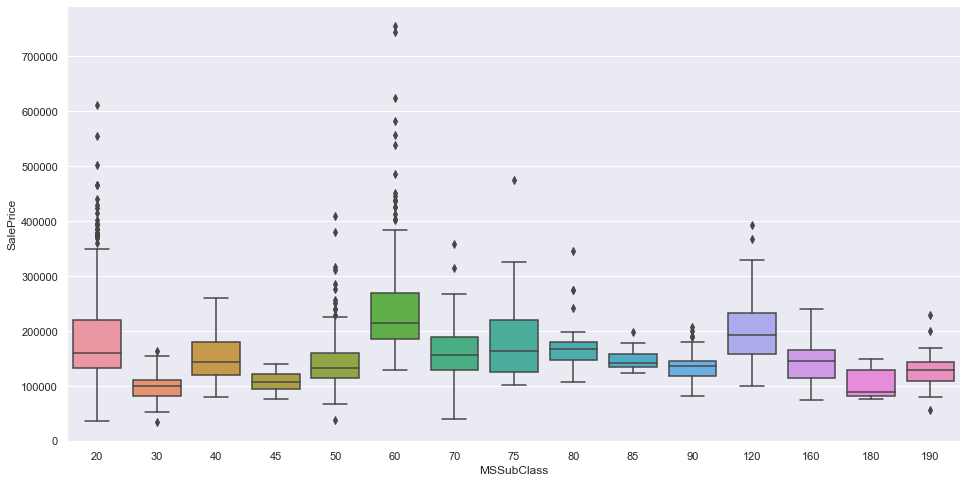

In [132]:
#draw blox plot of each variable against saleprice

f = plt.figure(figsize=(16, 8))

sb.boxplot(x='MSSubClass', y='SalePrice', data = categorical_data)
#CHANGES VERY SMALL HERE

<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

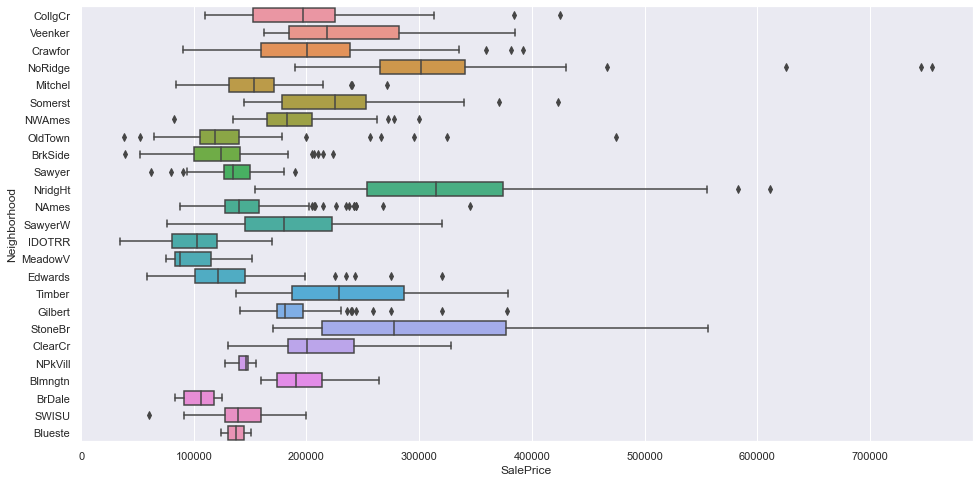

In [133]:
f = plt.figure(figsize=(16, 8))

sb.boxplot(x='SalePrice', y='Neighborhood', data = categorical_data)
#CHANGES ARE VERY DRASTIC HERE

<AxesSubplot:xlabel='SalePrice', ylabel='BldgType'>

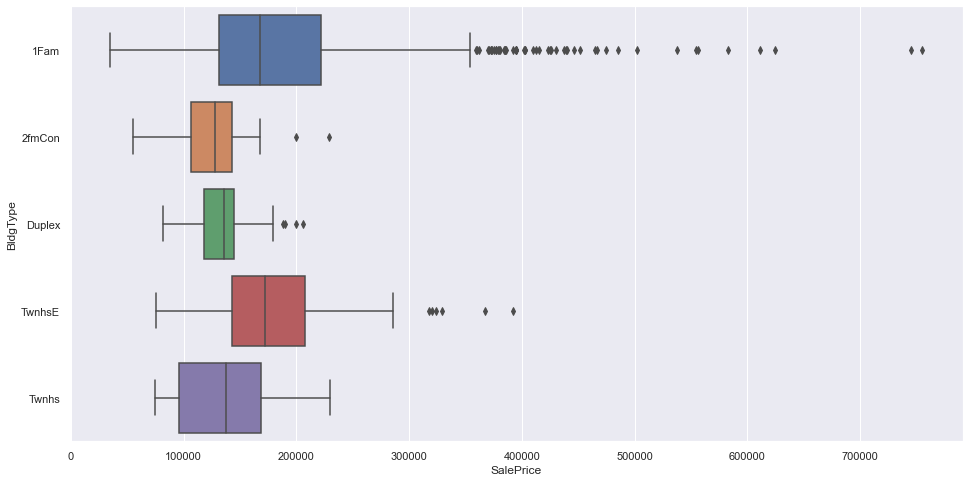

In [134]:
f = plt.figure(figsize=(16, 8))

sb.boxplot(x='SalePrice', y='BldgType', data = categorical_data)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

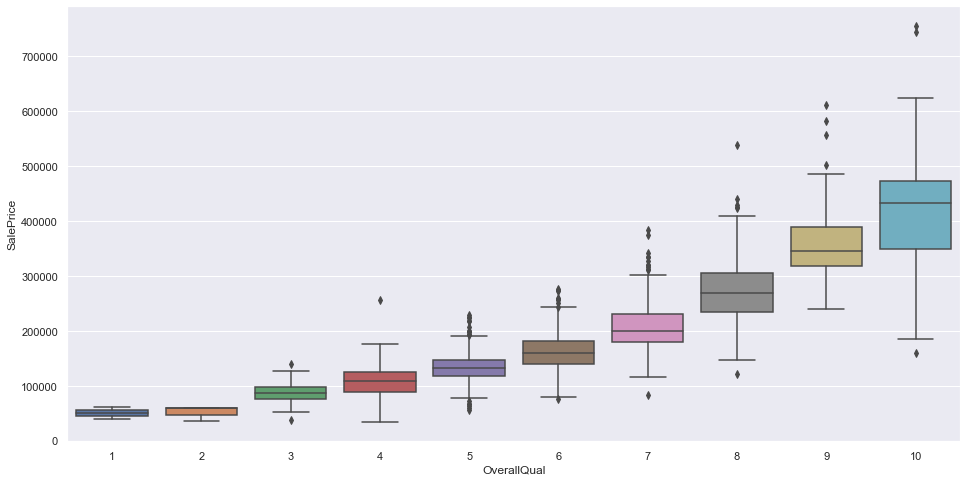

In [135]:
f = plt.figure(figsize=(16, 8))

sb.boxplot(x='OverallQual', y='SalePrice', data = categorical_data)
#AS OVERALLQUAL INCREASE, SALEPRICE INCREASE

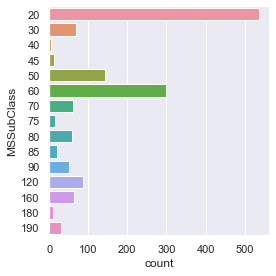

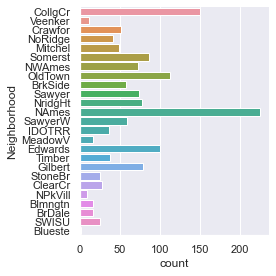

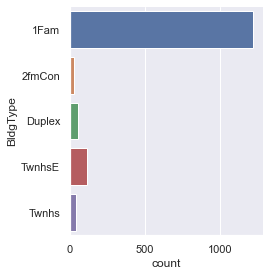

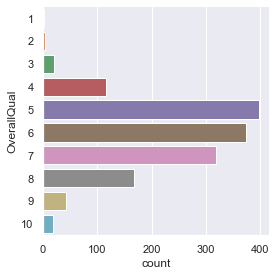

In [136]:
sb.catplot(y = "MSSubClass", data = hCategories, kind = "count", height = 4)
sb.catplot(y = "Neighborhood", data = hCategories, kind = "count", height = 4)
sb.catplot(y = "BldgType", data = hCategories, kind = "count", height = 4)
sb.catplot(y = "OverallQual", data = hCategories, kind = "count", height = 4)
#increasing height so the y values are easier to see

ANSWER TO PROBLEM 2B:
Neighborhood and OverallQual


BECAUSE neighborhood: changes are very drastic,
overallqual: it increases, saleprice increases

PROBLEM 3B 

<AxesSubplot:xlabel='SalePrice', ylabel='YearRemodAdd'>

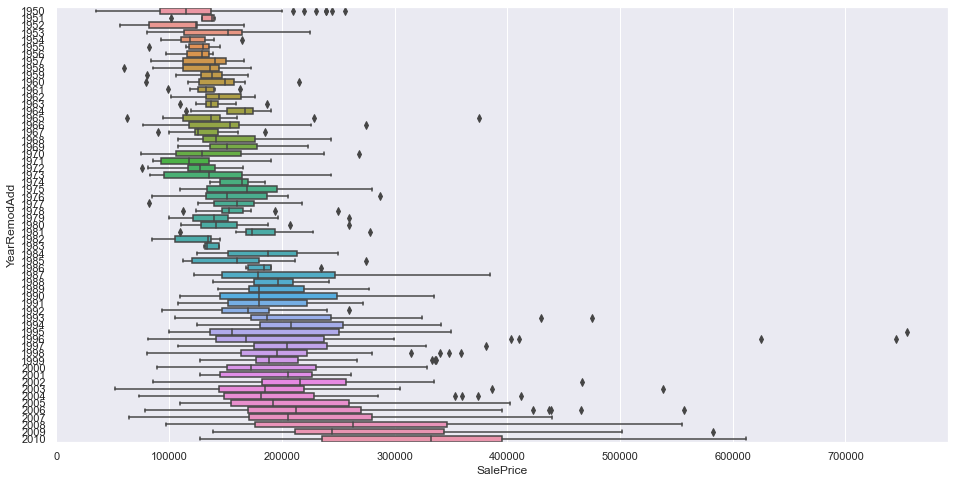

In [137]:
cat_data = pd.DataFrame(traindata[["SalePrice","YearRemodAdd"]])

f = plt.figure(figsize=(16, 8))

sb.boxplot(orient = 'h', x='SalePrice', y='YearRemodAdd', data = cat_data)

 prices of houses generally increase when the Year of Remodel is more recent

Yes, SalePrice of a house gets affected by how recently it got Remodeled